In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from keras.preprocessing.image import img_to_array,load_img

Using TensorFlow backend.


link to dataset = http://aicip.eecs.utk.edu/wiki/UTKFace

age :  1
gender :  0
race :  0


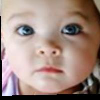

In [2]:
file_name = "1_0_0_20161219154018476.jpg.chip.jpg"
image = Image.open('UTKFace/1_0_0_20161219154018476.jpg.chip.jpg').resize((100,100))

print("age : ",file_name.split("_")[0])
print("gender : ",file_name.split("_")[1])
print("race : ",file_name.split("_")[2])

image

age :  1
gender :  0
race :  1


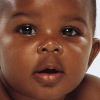

In [3]:
file_name="1_0_1_20170110213111809.jpg.chip.jpg"
image = Image.open('UTKFace/1_0_1_20170110213111809.jpg.chip.jpg').resize((100,100))

print("age : ",file_name.split("_")[0])
print("gender : ",file_name.split("_")[1])
print("race : ",file_name.split("_")[2])

image

In [39]:
files = os.listdir('UTKFace')
print(len(files))

23708


In [40]:
type(files)

list

In [41]:
from random import shuffle
shuffle(files)

In [42]:
height = 64
width = 64
channels = 3
X = None
X = np.ndarray(shape = (len(files),height,width,channels), dtype = np.float32)
y_age = []
y_gender = []
y_race = []
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [43]:
dir = 'UTKFace'
i=0
for image in files:
    if i%2000 == 0:
        print(i)
    img = load_img(dir + '/' + image)
    img = img.resize((width, height), Image.ANTIALIAS)
    x = img_to_array(img)
    x = x.reshape(height,width,channels)
    X[i] = x
    y_age.append(image.split("_")[0])
    y_gender.append(image.split("_")[1])
    y_race.append(image.split("_")[2])
    i+=1

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000


In [44]:
X = X.astype('float32')
X /= 255

In [45]:
print(X.shape)
print(len(y_age),len(y_gender),len(y_race))

(23708, 64, 64, 3)
23708 23708 23708


In [50]:
for i in range(len(y_race)):
    if len(y_race[i]) != 1:
        print(i, y_race[i])

3786 20170116174525125.jpg.chip.jpg
9062 20170109150557335.jpg.chip.jpg
15253 20170109142408075.jpg.chip.jpg


In [51]:
y_race[3786],y_race[9062],y_race[15253] = 0,0,0

In [53]:
y_age = list(map(float, y_age))
y_gender = list(map(float, y_gender))
y_race = list(map(float, y_race))

In [66]:
np.save("X.npy",X)
np.save("y_age.npy",y_age)
np.save("y_gender.npy",y_gender)
np.save("y_race.npy",y_race)

In [104]:
X =np.load("X.npy")
y_age = np.load("y_age.npy")
y_gender = np.load("y_gender.npy")
y_race = np.load("y_race.npy")

In [105]:
for i in range(len(y_age)):
    if y_age[i] <= 10:
        y_age[i] = 0
    if (y_age[i]>10) and (y_age[i]<=20):
        y_age[i] = 1
    if (y_age[i]>20) and (y_age[i]<30):
        y_age[i] = 2
    if (y_age[i]>=30) and (y_age[i]<40):
        y_age[i] = 3
    if (y_age[i]>=40) and (y_age[i]<60):
        y_age[i] = 4
    if (y_age[i]>=60):
        y_age[i] = 5

y_age

array([0., 2., 1., ..., 4., 5., 2.])

In [106]:
from keras.utils.np_utils import to_categorical

y_age = to_categorical(y_age, num_classes=6)
y_age[:10]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [107]:
y_race = to_categorical(y_race, num_classes=5)
y_race[:10]

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [129]:
y_gender = to_categorical(y_gender, num_classes=2)
y_gender[:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [130]:
X_train = X[:15000]
y_age_train = y_age[:15000]
y_gender_train = y_gender[:15000]
y_race_train = y_race[:15000]

X_val = X[15000:22000]
y_age_val = y_age[15000:22000]
y_gender_val = y_gender[15000:22000]
y_race_val = y_race[15000:22000]

X_test = X[22000:]
y_age_test = y_age[22000:]
y_gender_test = y_gender[22000:]
y_race_test = y_race[22000:]

In [131]:
len(X_train)+len(X_test) + len(X_val) == len(X)

True

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

In [115]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(GlobalAveragePooling2D())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 8, 8, 64)          51264     
__________

In [85]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'cnnbest_age.hdf5',verbose=1,save_best_only=True)

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(X_train,y_age_train, batch_size=100, epochs=20, validation_data=(X_val,y_age_val), callbacks = [checkpointer], verbose=1, shuffle=True)

Train on 15000 samples, validate on 7000 samples
Epoch 1/20
  200/15000 [..............................] - ETA: 44:44 - loss: 1468.5739 - acc: 0.0000e+00

KeyboardInterrupt: 

In [86]:
model.load_weights('cnnbest_age.hdf5')
score = model.evaluate(X_test, y_age_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.5948477750360547


In [87]:
file_path = "UTKFace/1_0_0_20161219154018476.jpg.chip.jpg"

img = load_img(file_path)
img.show()

In [95]:
labels_age =["CHILD",  # index 0
        "YOUTH",      # index 1
        "ADULT",     # index 2 
        "MIDDLEAGE",        # index 3 
        "OLD",         # index 4
        ]

In [96]:
img = img.resize((width, height), Image.ANTIALIAS)
x = img_to_array(img)
x = x.reshape(1,height,width,channels)

pred = model.predict(x)[0]
print(pred)
labels_age[list(pred).index(max(pred))]

[1. 0. 0. 0. 0. 0.]


'CHILD'

In [114]:
model_race = Sequential()
model_race.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu',input_shape=(64,64,3)))
model_race.add(MaxPooling2D(pool_size=2))

model_race.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model_race.add(MaxPooling2D(pool_size=2))

model_race.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu'))
model_race.add(MaxPooling2D(pool_size=2))

model_race.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model_race.add(MaxPooling2D(pool_size=2))

model_race.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu'))
model_race.add(MaxPooling2D(pool_size=2))

model_race.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model_race.add(MaxPooling2D(pool_size=2))

model_race.add(GlobalAveragePooling2D())

model_race.add(Dense(1024,activation='relu'))
model_race.add(Dropout(0.5))
model_race.add(Dense(5,activation='softmax'))
model_race.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 8, 8, 64)          51264     
__________

In [117]:
checkpointer = ModelCheckpoint(filepath = 'cnnbest_race.hdf5',verbose=1,save_best_only=True)

model_race.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_race.fit(X_train,y_race_train, batch_size=100, epochs=20, validation_data=(X_val,y_race_val), callbacks = [checkpointer], verbose=1, shuffle=True)

In [118]:
model_race.load_weights('cnnbest_race.hdf5')
score = model_race.evaluate(X_test, y_race_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7593676816384184


In [119]:
file_path = "UTKFace/1_0_0_20161219154018476.jpg.chip.jpg"

img = load_img(file_path)

In [120]:
labels_race = ['White', 'Black', 'Asian', 'Indian', 'Others']

In [122]:
img = img.resize((width, height), Image.ANTIALIAS)
x = img_to_array(img)
x = x.reshape(1,height,width,channels)

pred = model_race.predict(x)[0]
print(pred)
labels_race[list(pred).index(max(pred))]

[8.6597009e-18 0.0000000e+00 3.2278309e-03 1.0617539e-24 9.9677211e-01]


'Others'

In [125]:
model_gender = Sequential()
model_gender.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu',input_shape=(64,64,3)))
model_gender.add(MaxPooling2D(pool_size=2))

model_gender.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model_gender.add(MaxPooling2D(pool_size=2))

model_gender.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu'))
model_gender.add(MaxPooling2D(pool_size=2))

model_gender.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model_gender.add(MaxPooling2D(pool_size=2))

model_gender.add(Conv2D(filters = 32,kernel_size=5,padding='same',activation='relu'))
model_gender.add(MaxPooling2D(pool_size=2))

model_gender.add(Conv2D(filters = 64,kernel_size=5,padding='same',activation='relu'))
model_gender.add(MaxPooling2D(pool_size=2))

model_gender.add(GlobalAveragePooling2D())

model_gender.add(Dense(1024,activation='relu'))
model_gender.add(Dropout(0.5))
model_gender.add(Dense(2,activation='softmax'))
model_gender.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 8, 8, 64)          51264     
__________

In [126]:
checkpointer = ModelCheckpoint(filepath = 'cnnbest_gender.hdf5',verbose=1,save_best_only=True)

model_gender.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_gender.fit(X_train,y_gender_train, batch_size=100, epochs=20, validation_data=(X_val,y_gender_val), callbacks = [checkpointer], verbose=1, shuffle=True)

In [132]:
model_gender.load_weights('cnnbest_gender.hdf5')
score = model_gender.evaluate(X_test, y_gender_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8916861826697893


In [133]:
file_path = "UTKFace/1_0_0_20161219154018476.jpg.chip.jpg"

img = load_img(file_path)

In [134]:
labels_gender = ['Boy', 'Girl']

In [135]:
img = img.resize((width, height), Image.ANTIALIAS)
x = img_to_array(img)
x = x.reshape(1,height,width,channels)

pred = model_gender.predict(x)[0]
print(pred)
labels_gender[list(pred).index(max(pred))]

[9.9974090e-01 2.5913253e-04]


'Boy'

In [141]:
import matplotlib
%matplotlib inline

file = 'UTKFace/1_0_1_20170110213111809.jpg.chip.jpg'

img = load_img(file)
img = img.resize((width, height), Image.ANTIALIAS)

x = img_to_array(img)
x = x.reshape(1,height,width,channels)

labels_age =["CHILD","YOUTH","ADULT","MIDDLEAGE","OLD","VERY OLD"]
labels_race = ['White', 'Black', 'Asian', 'Indian', 'Others']
labels_gender = ['Boy', 'Girl']

model.load_weights('cnnbest_age.hdf5')

pred = model.predict(x)[0]
#print(pred)
print(labels_age[list(pred).index(max(pred))])

model_race.load_weights('cnnbest_race.hdf5')

pred = model_race.predict(x)[0]
#print(pred)
print(labels_race[list(pred).index(max(pred))])

model_gender.load_weights('cnnbest_gender.hdf5')

pred = model_gender.predict(x)[0]
#print(pred)
print(labels_gender[list(pred).index(max(pred))])


img.show()

CHILD
Indian
Girl
